# Esercitazione di Laboratorio n. 1

- *Parte III: Generatore di passeggiate casuali*

I componenti di una comitiva di ubriachi, partendo ognuno da uno stesso punto di un giardino pubblico, devono raggiungere un muro. Ognuno ha la possibilità di muoversi in tre direzioni: diritto, destra o sinistra. Per semplicità si supponga che i percorsi siano vincolati ad una griglia $100 \times 100$ e le coordinate $(x,y)$ siano valori discreti. Si supponga inoltre che la posizione di partenza sia di coordinate $(0,\ 50)$. Progettare ed implementare un algoritmo che calcola il numero medio di passi per arrivare al muro, la percentuale di coloro che compiono la minore e la maggiore distanza.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as ran
from time import time
colors=['red','darkorange','yellow','darkgreen','blue','magenta','indigo']

                                                  #il programma parte da un elenco con un numero arbitrario di colori;
N=len(colors)                                     #ogni colore corrisponde a un ubriaco inserito nel giardino, la cui
XX=[]                                             #traiettoria avrà quel colore; vengono quindi rappresentati N ubriachi.
YY=[]                                             #XX,YY sono matrici che saranno riempite con N liste di(rispettivamente)
SS=[]                                             #ascisse e ordinate,le quali serviranno per rappresentare graficamente le
                                                  #N traiettorie.SS è la lista dei numeri di passi occorsi agli N ubriachi.
for n in range(N):
    r=[0,50]                                      #inizializziamo il "vettore posizione" r con le coordinate iniziali 0,50;
    X,Y=[r[0]],[r[1]]                             #X,Y sono i vettori delle ascisse e delle ordinate del singolo ubriaco;
    steps=0                                       #si espanderanno all'evolvere della passeggiata. steps è il contatore di
                                                  #passi, sempre del singolo ubriaco.
    while r[1]>-50:                               #La condizione per far proseguire la passeggiata è che y>-50.
        ξ=ran.random()                            #ξ è la variabile casuale con cui stabilire la direzione a ogni passo.
    
        if abs(r[0])==50:                         #questa clausola 'if' occorre solo nel caso in cui è raggiunto uno dei
            if 0<=ξ<1/2:                          #due muri laterali (|x|=50). In tal caso si assume che l'ubriaco ha una
                steps+=1                          #una probabilità pari a 1/2 di invertire rotta ( r[0]-=np.sign(r[0]) )
                r[0]-=np.sign(r[0])               #e altrettanto di girare e avanzare in direzione diritta (verso il
                X.append(r[0])                    #traguardo). Qualsiasi movimento dell'ubriaco è seguito dall'aggiornarsi
                Y.append(r[1])                    #delle liste di coordinate X,Y
            else:
                steps+=1
                r[1]-=1
                Y.append(r[1])
                X.append(r[0])

        else:                                     #quando l'ubriaco non si trova a contatto con uno dei muri laterali,
            if 0<=ξ<1/3:                          #ha probabilità 1/3 di proseguire a sinistra, 1/3 a destra e 1/3 dritto.
                steps+=1
                r[0]-=1
                X.append(r[0])
                Y.append(r[1])
            elif 1/3<=ξ<2/3:
                steps+=1
                r[0]+=1
                Y.append(r[1])
                X.append(r[0])
            else:
                steps+=1
                r[1]-=1
                X.append(r[0])
                Y.append(r[1])

    XX.append(X)                                  #quando l'ubriaco raggiunge il muro frontale, XX e YY sono aggiornate con
    YY.append(Y)                                  #le colonne delle ascisse e delle ordinate. Analogamente, SS viene a
    SS.append(steps)                              #comporsi dei numeri di passi necessari a ogni ubriaco.

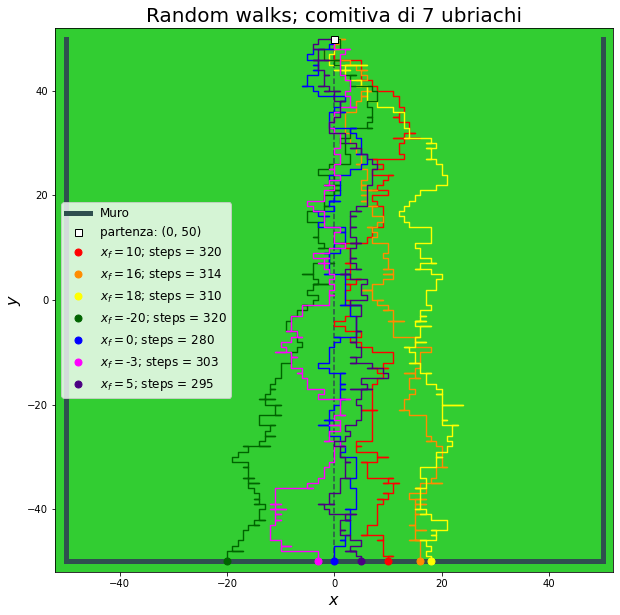

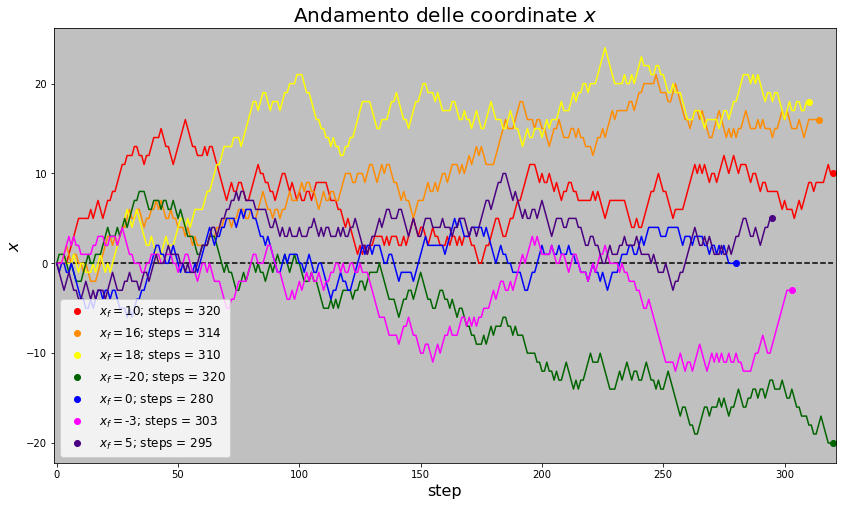

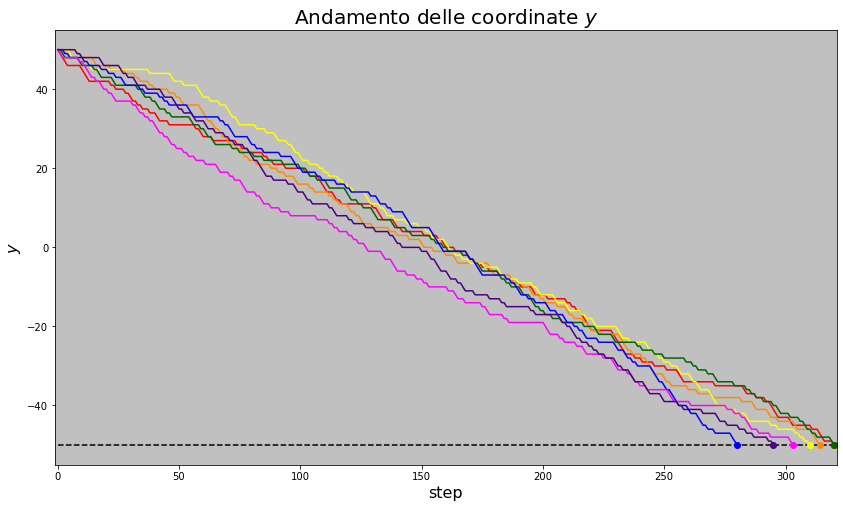

In [2]:
plt.figure(figsize=(10,10))
ax=plt.axes()
ax.set_facecolor('limegreen')
plt.plot([0,0],[-50,50],'darkslategrey',ls='--')                 #rappr. del riferimento: asse x=0
plt.plot([-50,-50],[-50,50],'darkslategrey',lw=5,label='Muro')   #rappr. del muro sinistro
plt.plot([-50,50],[-50,-50],'darkslategrey',lw=5)                #rappr. del muro frontale (traguardo)
plt.plot([50,50],[-50,50],'darkslategrey',lw=5)                  #rappr. del muro destro

for n in range(N):
    plt.plot(XX[n],YY[n],lw=1.4,c=colors[n])                     #rappr. delle N traiettorie
plt.plot([0],[50],'s w',ms=7,mec='k',label='partenza: (0, 50)')  #rappr. del punto di partenza (0,50)

if N==1:                                                         #caso specifico di un solo ubriaco (un solo colore)
    plt.title('Random walk; 1 ubriaco',size=20)
    plt.plot([r[0]],[-50],'s k',ms=7,mec='w',label='$x_f=$'+str(r[0])+'; steps = '+str(SS[0]))
else:
    plt.title('Random walks; comitiva di '+str(N)+' ubriachi',size=20) #per N ubriachi rappresento ogni punto di arrivo
    for n in range(N):                                                 #con un pallino del rispettivo colore
        plt.plot([XX[n][-1]], [-50],'o',c=colors[n],ms=7,label='$x_f=$'+str(XX[n][-1])+'; steps = '+str(SS[n]))

plt.xlim([-52,52])
plt.ylim([-52,52])
plt.xlabel('$x$',size=16)
plt.ylabel('$y$',size=16)
plt.legend(fontsize=12)
plt.show()


if N==1:                                                #rappr. dell'andamento dell'ascissa e dell'ordinata al crescere
    plt.figure(figsize=(14,8))                          #dei passi (caso di un singolo ubriaco)
    ax=plt.axes()
    ax.set_facecolor('silver')
    plt.title('Andamento delle coordinate',size=20)
    plt.plot([0,steps],[0,0],'--k')
    plt.plot([0,steps],[-50,-50],'--k')
    plt.plot(X,'r',label='x(step)')
    plt.plot(Y,'b',label='y(step)')
    plt.plot([0,steps],[0,r[0]],'o r',label='$x_i=0,\; x_f=$'+str(r[0]))
    plt.plot([0,steps],[50,-50],'o b',label='$y_i=50,\; y_f=-50$')
    plt.xlim([-1,steps+1])
    plt.xlabel('step',size=16)
    plt.ylabel('$x,\; y$',size=16)
    plt.legend(fontsize=12)
    plt.show()

else:                                                   #se ci sono più ubriachi, si rappresenta in un grafico l'evoluzione
    plt.figure(figsize=(14,8))                          #delle ascisse; in un altro l'evoluzione delle ordinate
    ax=plt.axes()
    ax.set_facecolor('silver')
    plt.title('Andamento delle coordinate $x$',size=20)
    plt.plot([0,max(SS)],[0,0],'--k')
    
    for n in range(N):
        plt.plot(XX[n],c=colors[n])
        plt.plot([SS[n]],[XX[n][-1]],'o ',c=colors[n],label='$x_f=$'+str(XX[n][-1])+'; steps = '+str(SS[n]))
    
    plt.xlim([-1,max(SS)+1])
    plt.xlabel('step',size=16)
    plt.ylabel('$x$',size=16)
    plt.legend(fontsize=12)
    plt.show()


    plt.figure(figsize=(14,8))
    ax=plt.axes()
    ax.set_facecolor('silver')
    plt.title('Andamento delle coordinate $y$',size=20)
    plt.plot([0,max(SS)],[-50,-50],'--k')
    
    for n in range(N):
        plt.plot(YY[n],c=colors[n])
        plt.plot([SS[n]],[YY[n][-1]],'o ',c=colors[n])
    
    plt.xlim([-1,max(SS)+1])
    plt.xlabel('step',size=16)
    plt.ylabel('$y$',size=16)
    plt.show()

In [3]:
Nwalks=3*10**6                          #In questa fase, dato un numero di ubriachi (o di passeggiate) pari a Nwalks, si
X_steps=[]                              #vuole studiare la distribuzione del numero di passi necessario a raggiungere il
X_fin=[]                                #traguardo (nel presente algoritmo si fa lo stesso con l'ascissa finale raggiunta
steps_min,steps_max = 10**9,0           #dagli ubriachi - come nella macchina di Galton). I dati sono raccolti in X_steps e
Sum,Sum2=0,0                            #X_fin. steps_min e steps_max sono indicatori dinamici che tengono traccia del
SumX,SumX2=0,0                          #del numero massimo e minimo di passi eseguiti. Sono posti a valori convenzionali
                                        #per i quali si ha pressoché la certezza che poi vengano aggiornati (un ubriaco non
T=time()                                #potrà mai raggiungere il traguardo in meno di 0 passi, quindi se poniamo
for n in range(Nwalks):                 #steps_max = 0 abbiamo la garanzia che questo indicatore sarà aggiornato con un
    r=[0,50]                            #valore più grande. Invece, in linea di principio non c'è un estremo superiore per
    steps=0                             #il numero di passi (un ubriaco può oscillare indefinitamente a destra e sinistra
                                        #prima di proseguire in avanti e raggiungere il traguardo); quindi l'assegnazione
    while r[1]>-50:                     #steps_min=10^9 non è rigorosamente giustificata a priori (lo sarebbe a posteriori
        ξ=ran.random()                  #osservando che il valor medio della distribuzione è molto minore di 10^9).
                                        #In generale, per svincolarsi da questo genere di problema, sarebbe stato opportuno
        if abs(r[0])==50:               #inviare il primo ubriaco, prendere nota del suo numero di passi s0, e inizializza-
            if 0<=ξ<1/2:                #re con s0 sia steps_min che steps_max (l'equivalente del costrutto "do while" in
                steps+=1                #in C++, che però non penso esista in Python).
                r[0]-=np.sign(r[0])
            else:                       #Sum e Sum2 sono la somma e la somma dei quadrati dei numeri di passi, in modo da
                steps+=1                #poterne valutare agevolmente media e varianza. Stessa cosa per SumX e SumX2, per
                r[1]-=1                 #le ascisse al traguardo.

        else:
            if 0<=ξ<1/3:
                steps+=1
                r[0]-=1
            elif 1/3<=ξ<2/3:
                steps+=1
                r[0]+=1
            else:
                steps+=1
                r[1]-=1

    if steps<steps_min:                 #L'aggiornamento di steps_min e steps_max avviene al termine di ogni passeggiata
        steps_min=steps                 #per confronto con i valori precedenti in storage. Da qui la necessità di scegliere
    elif steps>steps_max:               #con cautela i valori iniziali di steps_min e steps_max (vogliamo essere 'sicuri'
        steps_max=steps                 #che entrambi i dati vengano effettivamente aggiornati).

    X_steps.append(steps)               #Aggiornamento del campione dei passi
    X_fin.append(r[0])                  #Aggiornamento del campione delle x finali
    Sum+=steps
    Sum2+=steps**2
    SumX+=r[0]
    SumX2+=r[0]**2


mi_steps=Sum/Nwalks                          #Media, varianza e deviazione standard dei passi
s2_steps= (Sum2 - Sum**2/Nwalks)/(Nwalks-1)
s_steps=np.sqrt(s2_steps)

mi_X=SumX/Nwalks                             #Media, varianza e deviazione standard delle x finali
s2_X=(SumX2 - SumX**2/Nwalks)/(Nwalks-1)
s_X=np.sqrt(s2_X)

Nsteps_min=X_steps.count(steps_min)          #Calcolo di quante volte è stato compiuto il numero minimo (e massimo) di
Nsteps_max=X_steps.count(steps_max)          #passi all'interno del campione

p_min=100*Nsteps_min/Nwalks                  #Percentuale di ubriachi che hanno compiuto il numero minore e maggiore
p_max=100*Nsteps_max/Nwalks                  #di passi

T1=time()-T

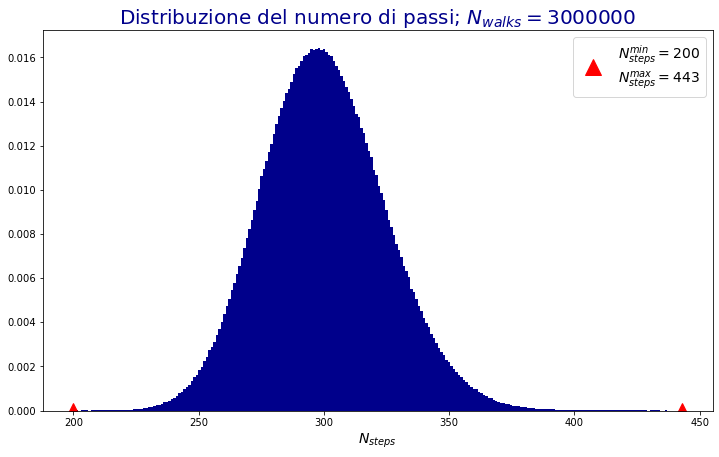

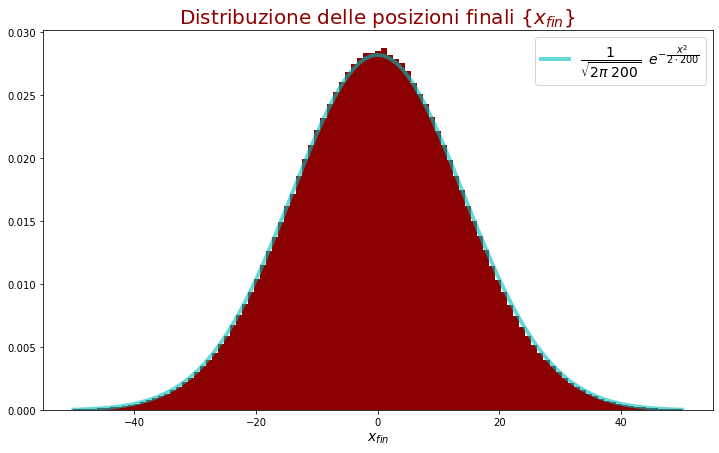

Compagnia di 3000000 ubriachi

Tempo di esecuzione:        t = 679.83 s
Numero medio di passi:     mi = 299.993
Varianza:                  s2 = 600.553
Deviazione standard:        s = 24.506 

Posizione finale media:    mi = -0.0096
Varianza:                  s2 = 199.908
Deviazione standard:        s = 14.139 

N.  minimo di passi compiuti: 200 , da 1 ubriachi ( 3.3e-05 %)
N. massimo di passi compiuti: 443 , da 1 ubriachi ( 3.3e-05 %)


In [4]:
T=time()
plt.figure(figsize=(12,7))                                                                 #istogramma dei passi; volendo è
plt.hist(X_steps, bins=steps_max-steps_min+1, density=True,log=False,color='darkblue')     #possibile rimuovere la norma-
plt.plot([steps_min,steps_max],[0,0],'^ r',ms=16,                                          #lizzazione e/o impostare la
         label='$N_{steps}^{min}=$'+str(steps_min)+'\n$N_{steps}^{max}=$'+str(steps_max))  #scala logaritmica.
plt.title('Distribuzione del numero di passi; $N_{walks}=$'+str(Nwalks),color='darkblue',size=20)
plt.xlabel('$N_{steps}$',size=14)
plt.legend(fontsize=14)
plt.show()

X=np.linspace(-50,50,101)                                                                #istogramma delle ascisse finali
plt.figure(figsize=(12,7))                                                               #confrontato con l'andamento di
plt.hist(X_fin,bins=101,range=(-50,50),density=True,log=False,color='darkred')           #una gaussiana centrata in x=0
plt.plot(X, np.exp(-X**2/(2*200)) / (np.sqrt(2*np.pi*200)),'c',lw=4,alpha=0.6,           #e con varianza pari a 200 (estra-
         label='$\dfrac{1}{\sqrt{2\pi\; 200}}\;\; e^{-\dfrac{x^2}{2\cdot200}} $')        #polata dalla varianza campionaria
plt.title('Distribuzione delle posizioni finali $\{x_{fin} \}$',color='darkred',size=20) #a posteriori. Anche qui si può
plt.xlabel('$x_{fin}$',size=14)                                                          #rimuovere la normalizzazione e
plt.legend(fontsize=14)                                                                  #impostare la scala logaritmica
plt.show()                                                                               #(argomenti 'density' e 'log') per
T2=time()-T                                                                              #seguire come cambiano gli ordini
ΔT=T2+T1                                                                                 #di grandezza alle posizioni più
                                                                                         #estreme della distribuzione.
print('Compagnia di',Nwalks,'ubriachi\n')
print('Tempo di esecuzione:        t =',round(ΔT,3),'s')
print('Numero medio di passi:     mi =',round(mi_steps,3))
print('Varianza:                  s2 =',round(s2_steps,3))
print('Deviazione standard:        s =',round(s_steps,3),'\n')
print('Posizione finale media:    mi =',round(mi_X,4))
print('Varianza:                  s2 =',round(s2_X,3))
print('Deviazione standard:        s =',round(s_X,3),'\n')
print('N.  minimo di passi compiuti:',steps_min,', da',Nsteps_min,'ubriachi (',round(p_min,6),'%)')
print('N. massimo di passi compiuti:',steps_max,', da',Nsteps_max,'ubriachi (',round(p_max,6),'%)')